In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SenoirCitizen is a categorical  hence the 25%,50%,75% distribution is not proper

75% percent customer have tenure less 55 months

Average Montly charges are USD 64.76 where 25% customer pays USD 89.85 per month

### Data Visualization

<AxesSubplot:>

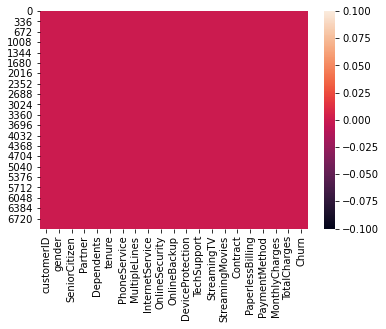

In [8]:
sns.heatmap(df.isnull())

Text(0.5, 1.02, 'Count of Target Variable per category')

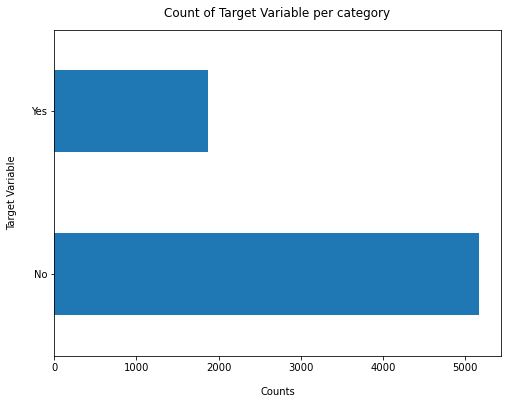

In [9]:
df["Churn"].value_counts().plot(kind = "barh",figsize = (8,6))
plt.xlabel("Counts",labelpad = 14)
plt.ylabel("Target Variable",labelpad = 14)
plt.title("Count of Target Variable per category",y = 1.02)

In [10]:
100*df["Churn"].value_counts()/len(df["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalance, ratio = 73:27
So we analyse the data with other features while taking the target value separately to get some insights

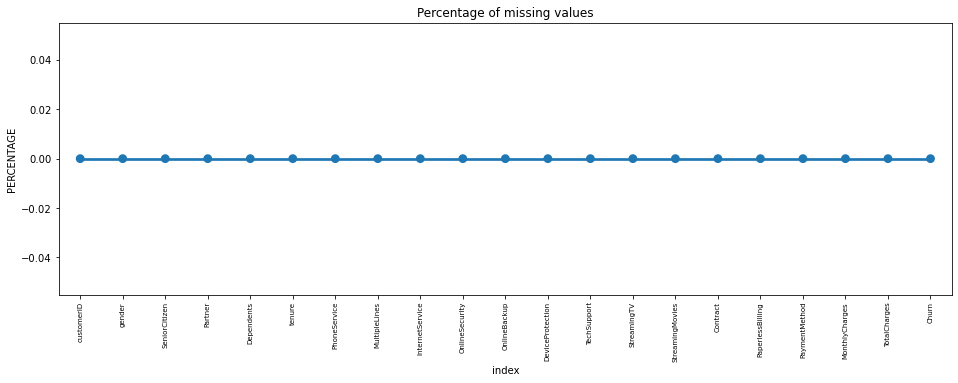

In [12]:
missing = pd.DataFrame((df.isnull().sum())* 100/df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax  = sns.pointplot('index',0,data = missing)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Total Charge should of numeric let convert it into numerical data type


In [13]:
df_copy = df.copy()

In [14]:
df_copy.TotalCharges = pd.to_numeric(df.TotalCharges,errors = 'coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see that there are 11 missing values in TotalCharges let check these records

In [15]:
df_copy.loc[df_copy["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of these records to total dataset is low i.e 0.15%, it safe to ignore them from the further processing.

In [16]:
# Removing the missing values 
df_copy.dropna(how = 'any',inplace = True)

In [17]:
# Get maximum tenure 
print(df_copy['tenure'].max())

72


In [18]:
# Group the tenure in bins of 12 months 
labels = ["{0} - {1}".format(i,i,+11)for i in range (1, 72, 12)]

df_copy["tenure_group"] = pd.cut(df_copy.tenure, range(1, 80, 12),right = False, labels = labels)

In [19]:
df_copy['tenure_group'].value_counts()

1 - 1      2175
61 - 61    1407
13 - 13    1024
49 - 49     832
25 - 25     832
37 - 37     762
Name: tenure_group, dtype: int64

In [20]:
df_copy.drop(columns = ["customerID",'tenure'],axis = 1,inplace = True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 25
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 37
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 1


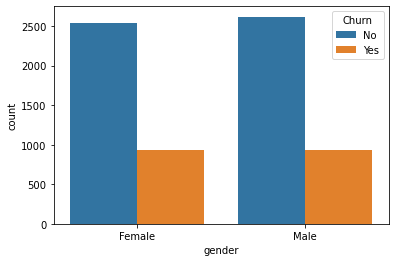

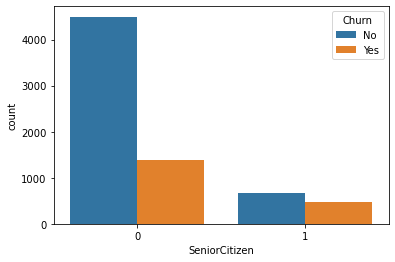

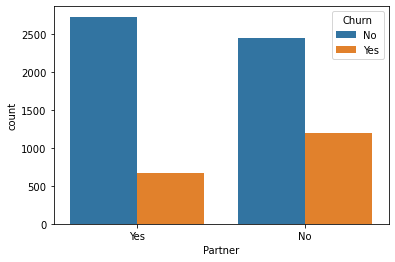

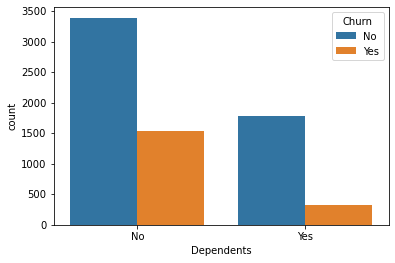

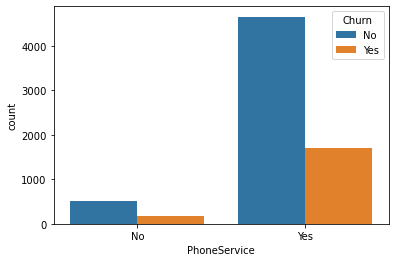

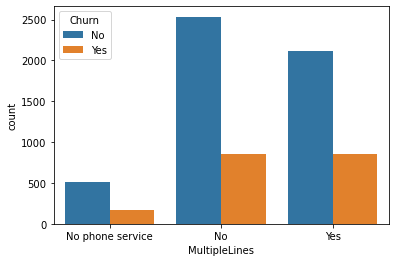

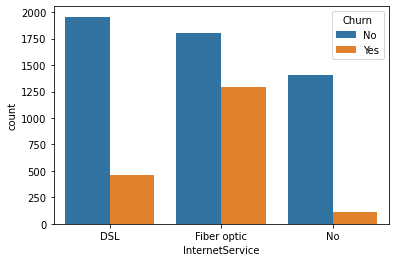

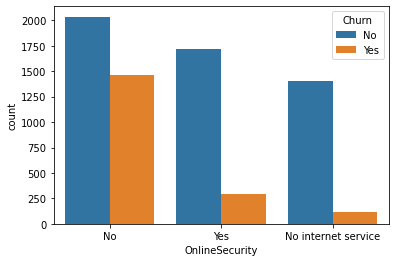

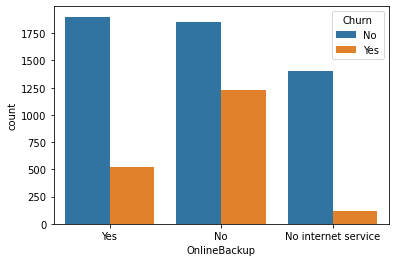

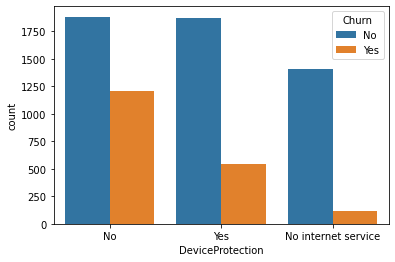

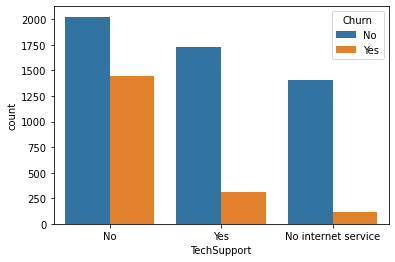

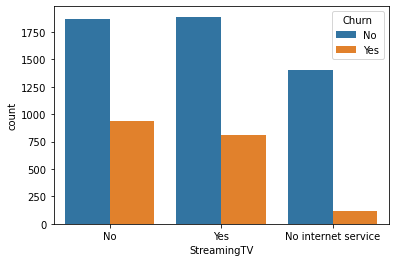

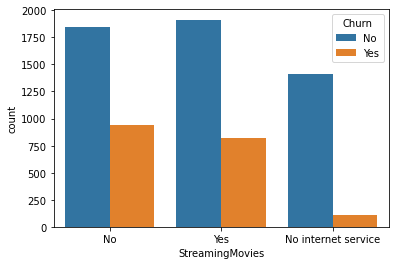

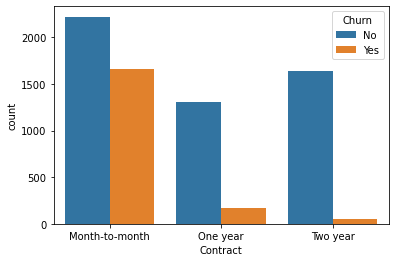

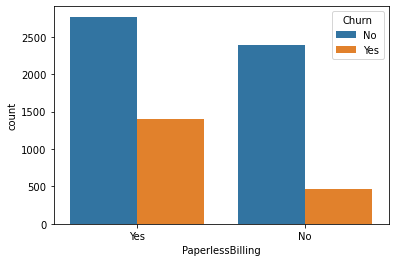

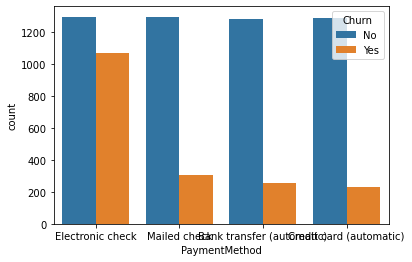

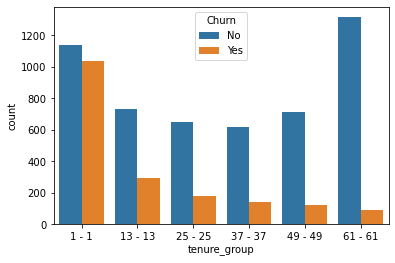

In [21]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

In [22]:
# Converting Target Variable Churn in binary numeric variable i.e Yes = 1, No= 0
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)

In [23]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 25
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 37
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 1


In [24]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 1,tenure_group_13 - 13,tenure_group_25 - 25,tenure_group_37 - 37,tenure_group_49 - 49,tenure_group_61 - 61
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


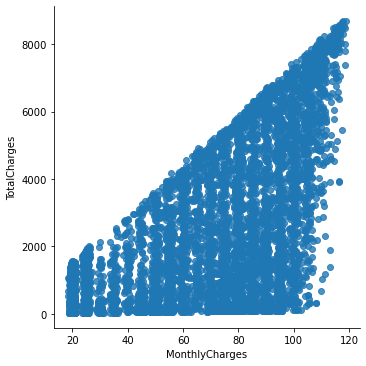

In [25]:
sns.lmplot(data = df_copy_dummies,x = "MonthlyCharges",y = "TotalCharges",fit_reg =False)

Total Charges increases as Montly Charges increases as excepted


Text(0.5, 1.0, 'Monthly charges by churn')

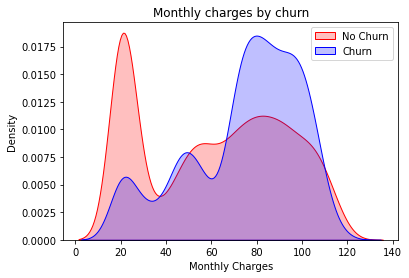

In [26]:

Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<AxesSubplot:>

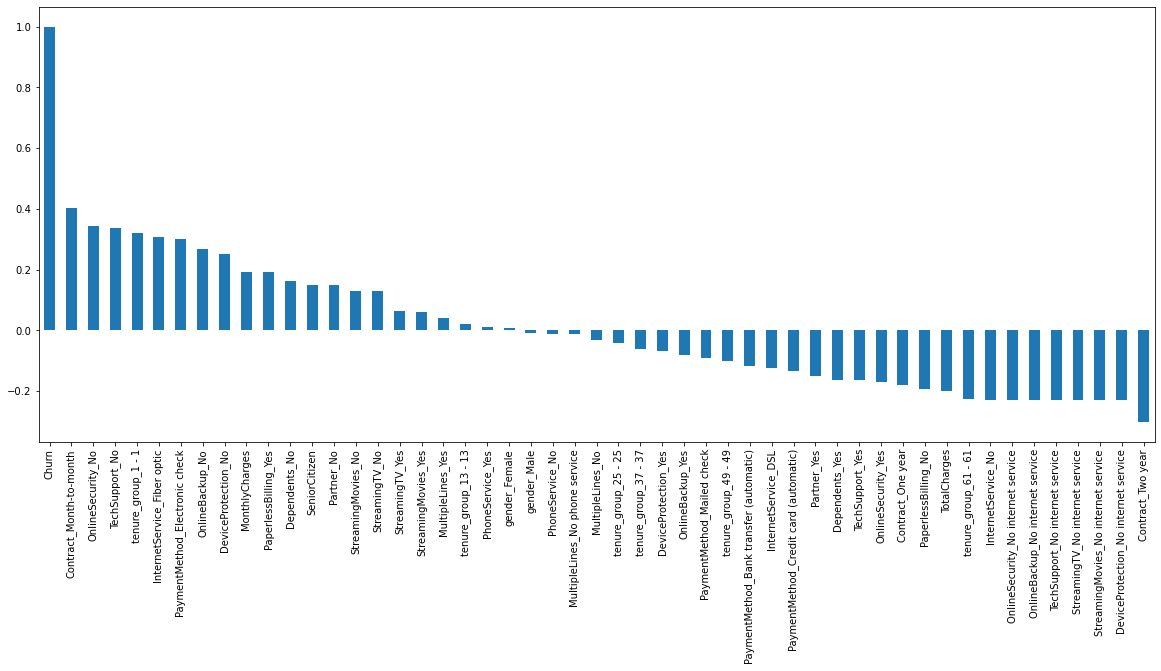

In [27]:
plt.figure(figsize = (20,8))
df_copy_dummies.corr()['Churn'].sort_values(ascending  = False).plot(kind = 'bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<AxesSubplot:>

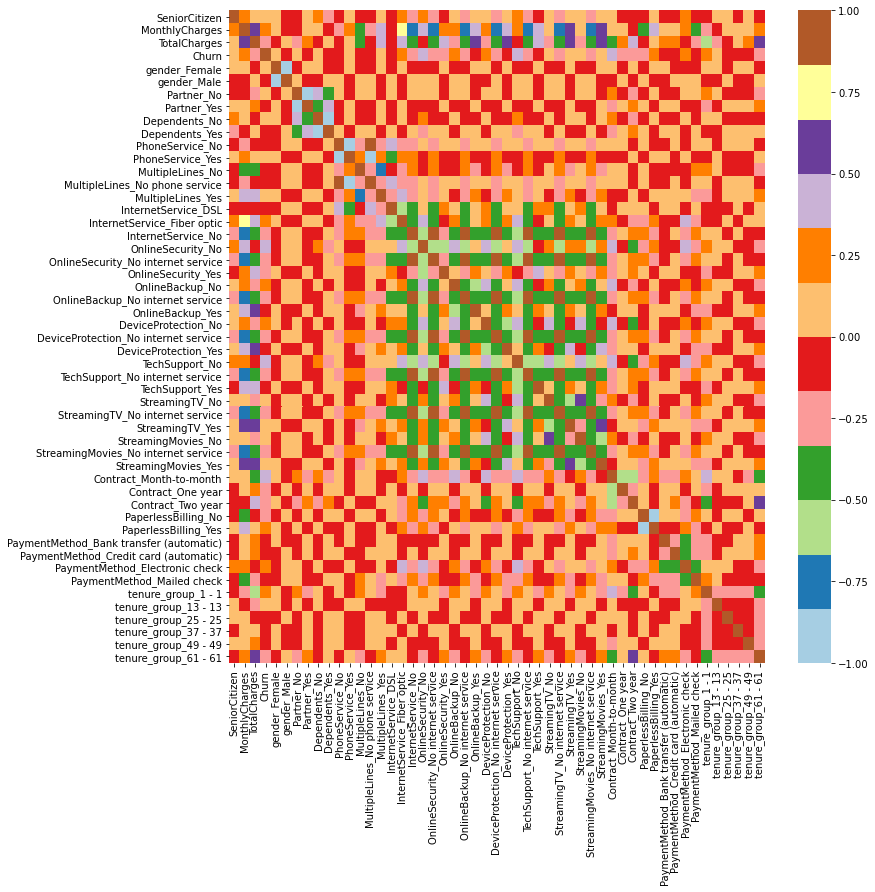

In [28]:
plt.figure(figsize= (12,12))
sns.heatmap(df_copy_dummies.corr(),cmap = "Paired")

### Bivariate Analysis

In [29]:
new_df_target0 = df_copy.loc[df_copy["Churn"] == 0 ]
new_df_target1 = df_copy.loc[df_copy["Churn"] == 1 ]

In [30]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

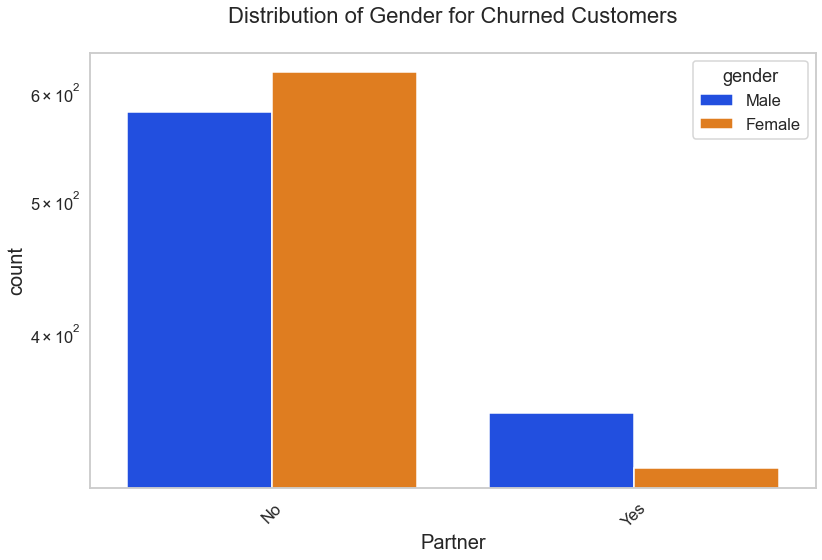

In [31]:
uniplot(new_df_target1,col = "Partner",title = "Distribution of Gender for Churned Customers",hue = 'gender')

In above plot we can identify that churned and are partner the male have mostly churned

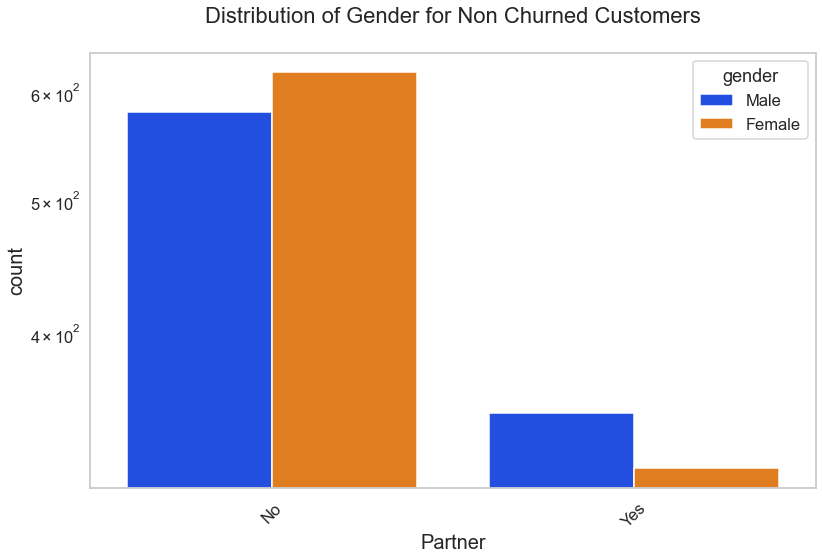

In [32]:
uniplot(new_df_target1,col = "Partner",title = "Distribution of Gender for Non Churned Customers",hue = 'gender')

In above plot we can identify that non churned being partner majority is of Male then Female 

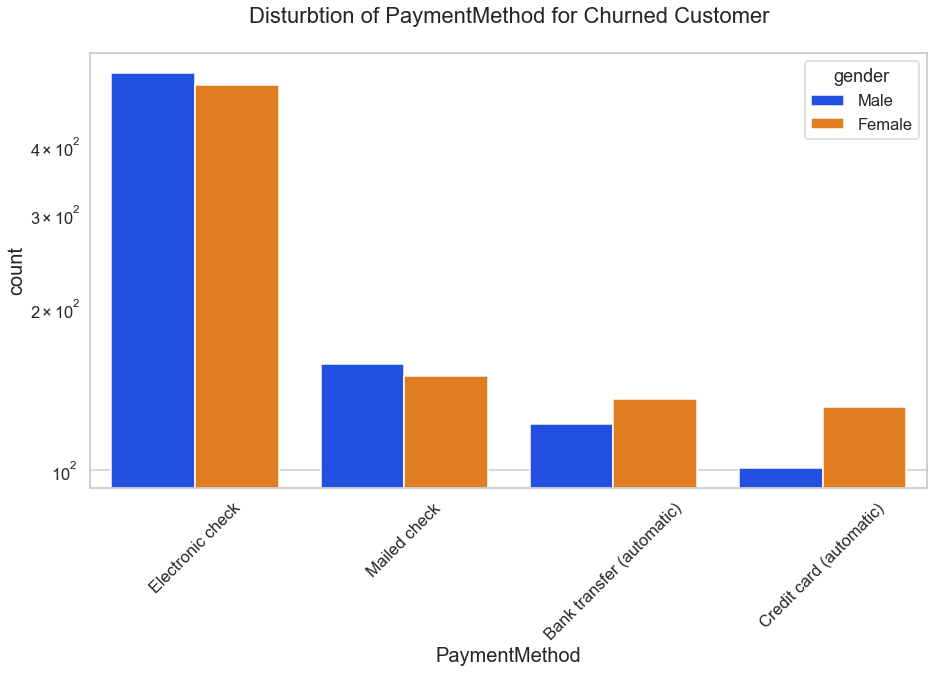

In [33]:
uniplot(new_df_target1,col = "PaymentMethod",title = "Disturbtion of PaymentMethod for Churned Customer",hue = 'gender')

In the above plot we have insight that the hue gender PaymentMethod Electronic check has male churner and Credit card more Female churner 

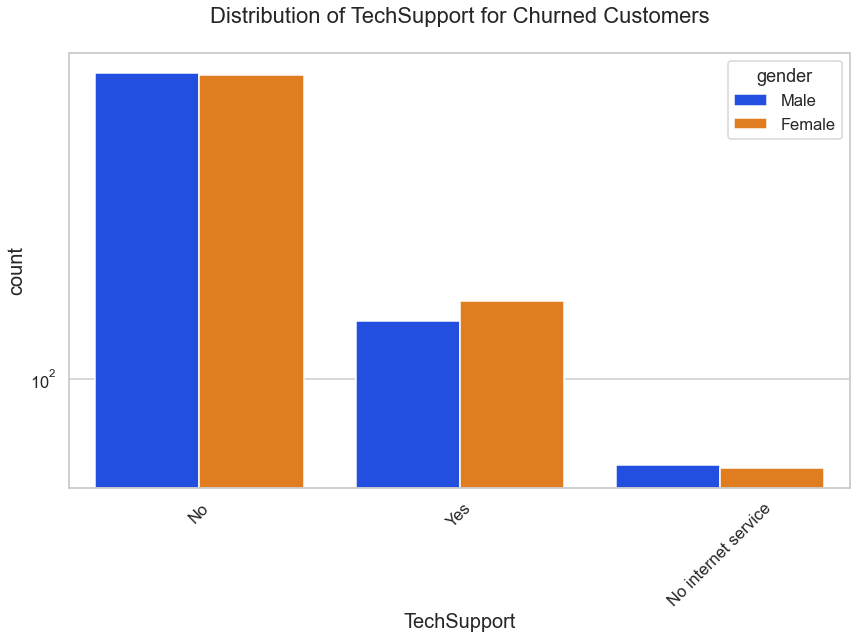

In [34]:
uniplot(new_df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

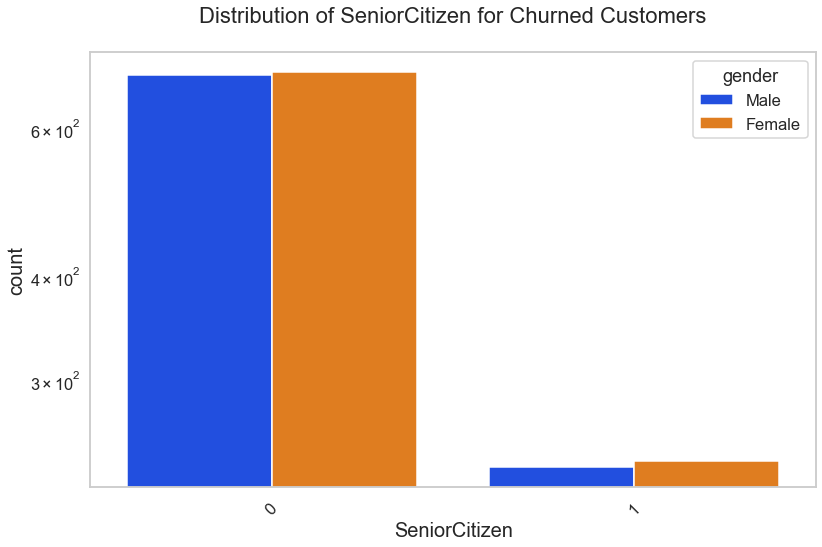

In [35]:
uniplot(new_df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### Conclusion

These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners

In [36]:
df_copy_dummies.to_csv('processed_churn.csv')

In [37]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [38]:
df1 = pd.read_csv('processed_churn.csv')
df1.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 1,tenure_group_13 - 13,tenure_group_25 - 25,tenure_group_37 - 37,tenure_group_49 - 49,tenure_group_61 - 61
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [39]:
df1 = df1.drop('Unnamed: 0',axis=1)

In [40]:
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 1,tenure_group_13 - 13,tenure_group_25 - 25,tenure_group_37 - 37,tenure_group_49 - 49,tenure_group_61 - 61
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Plotting Outliers

SeniorCitizen                                 AxesSubplot(0.125,0.816017;0.110714x0.0639831)
MonthlyCharges                             AxesSubplot(0.257857,0.816017;0.110714x0.0639831)
TotalCharges                               AxesSubplot(0.390714,0.816017;0.110714x0.0639831)
Churn                                      AxesSubplot(0.523571,0.816017;0.110714x0.0639831)
gender_Female                              AxesSubplot(0.656429,0.816017;0.110714x0.0639831)
gender_Male                                AxesSubplot(0.789286,0.816017;0.110714x0.0639831)
Partner_No                                    AxesSubplot(0.125,0.739237;0.110714x0.0639831)
Partner_Yes                                AxesSubplot(0.257857,0.739237;0.110714x0.0639831)
Dependents_No                              AxesSubplot(0.390714,0.739237;0.110714x0.0639831)
Dependents_Yes                             AxesSubplot(0.523571,0.739237;0.110714x0.0639831)
PhoneService_No                            AxesSubplot(0.656429,0.7392

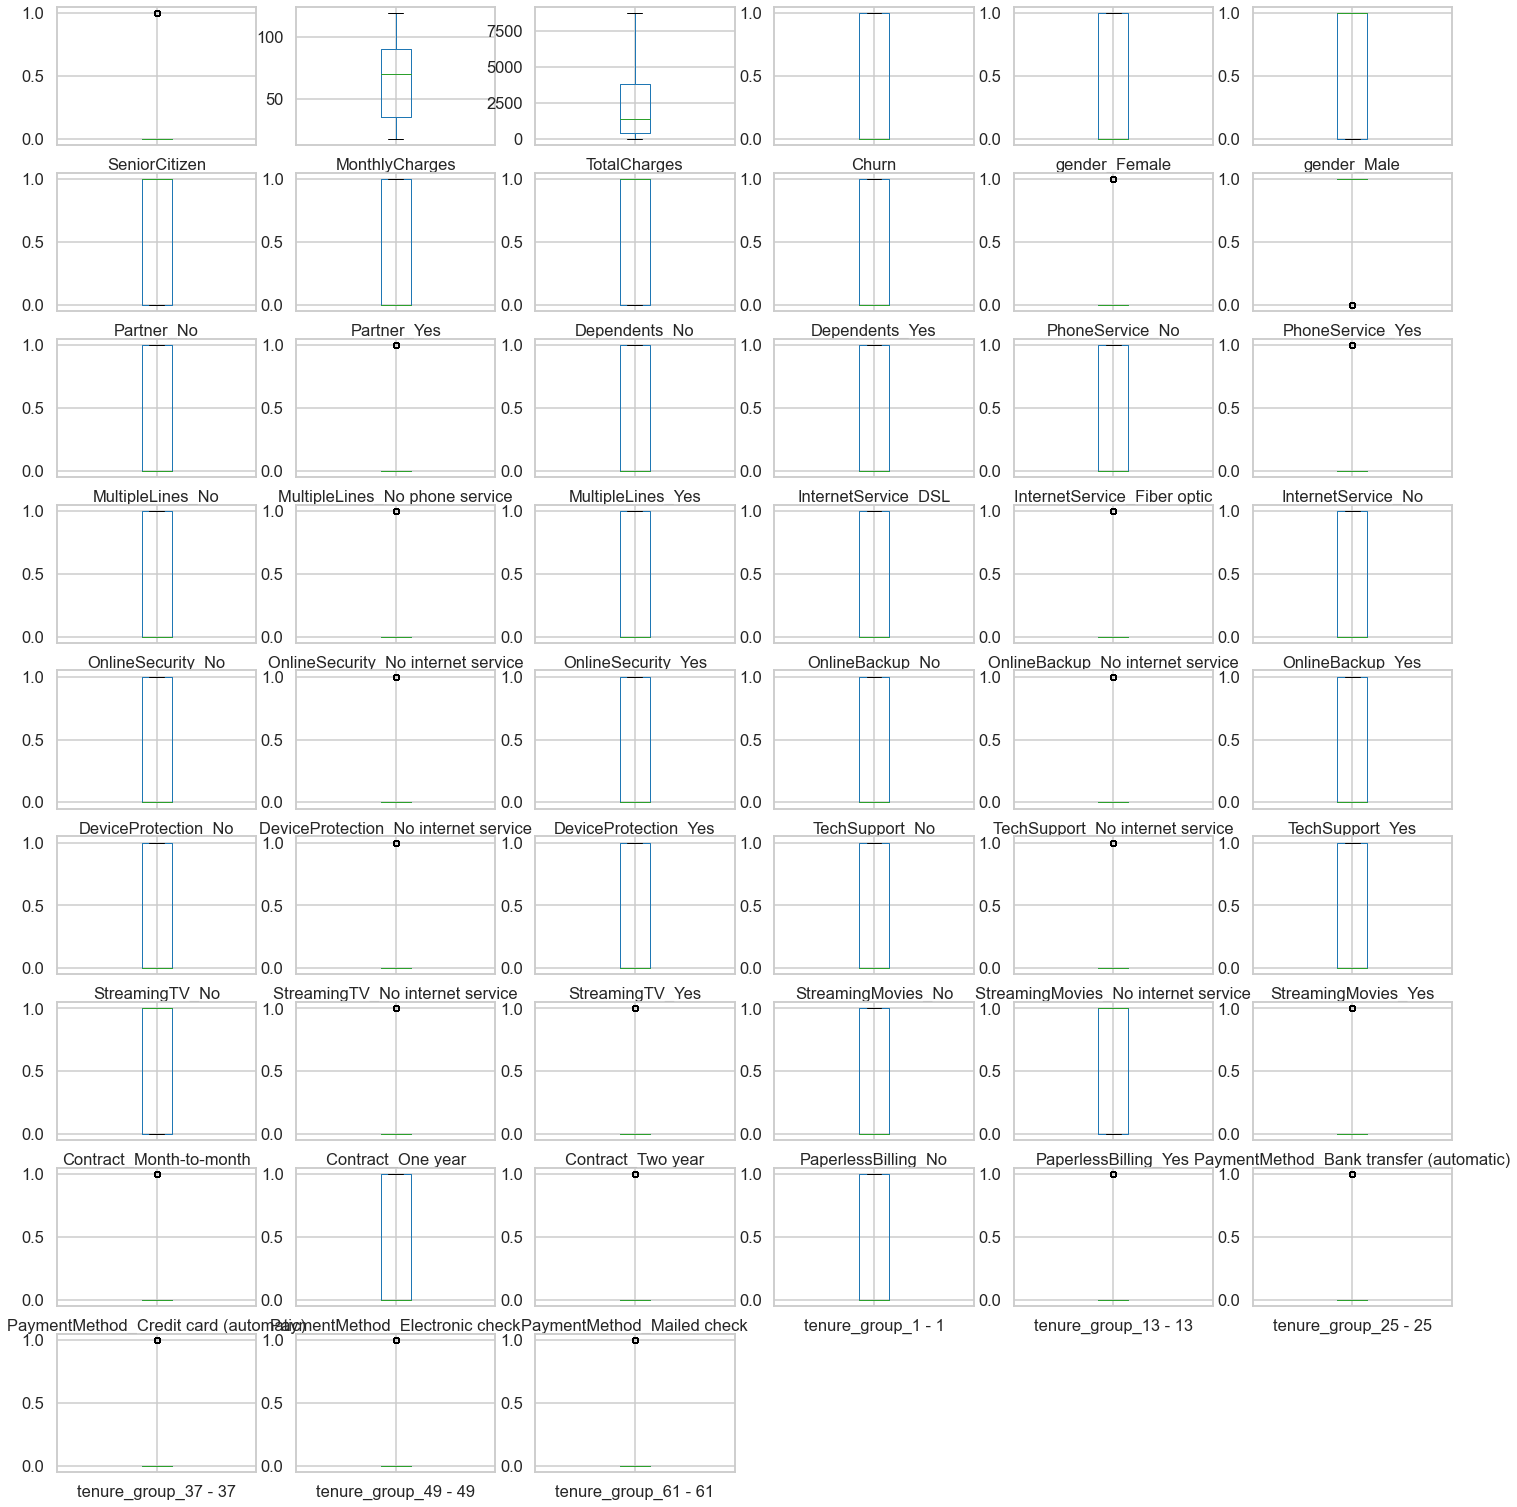

In [41]:
df1.plot(kind = 'box',figsize = (25,30),layout = (10,6),sharex = False, subplots = True)

In [42]:
df1.shape

(7032, 51)

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z


thersold = 3
print(np.where(z>3))

(array([   0,    0,    0, ..., 7029, 7029, 7029], dtype=int64), array([10, 11, 13, ..., 10, 11, 13], dtype=int64))


In [44]:
df_new = df1[(z<3).all(axis = 1)]
print(df1.shape)
print(df_new.shape)

(7032, 51)
(6352, 51)


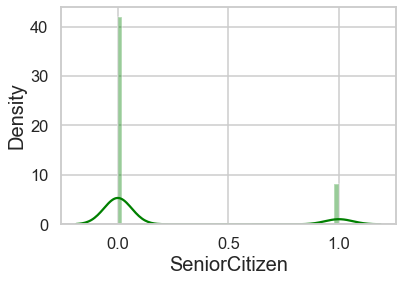

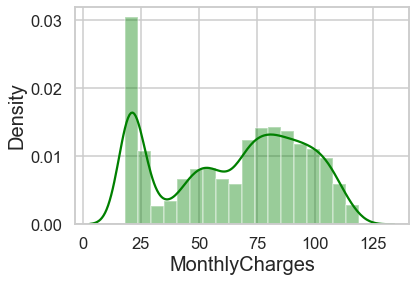

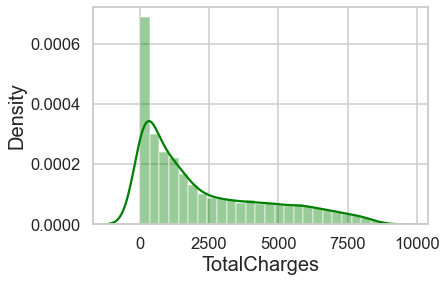

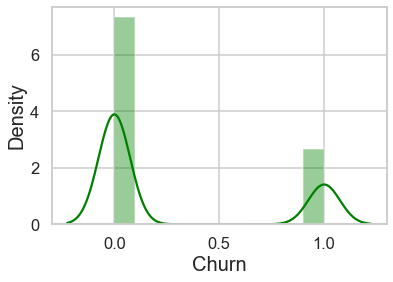

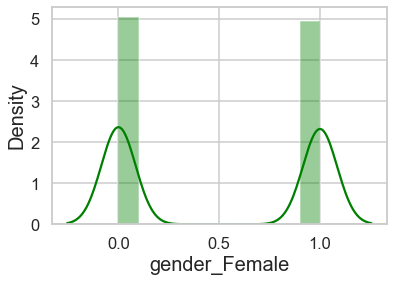

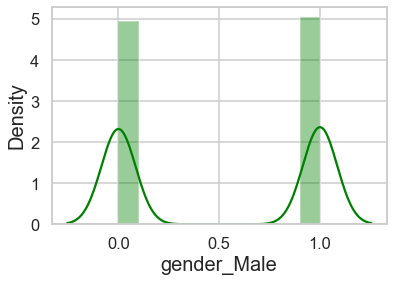

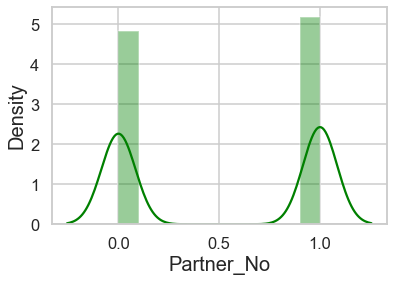

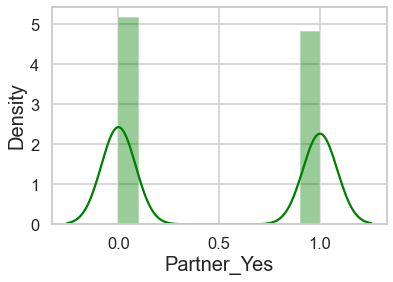

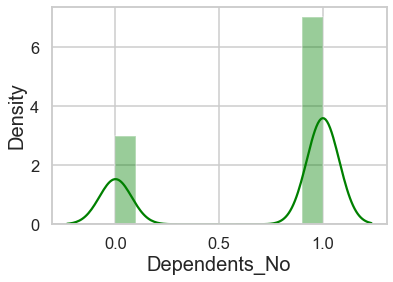

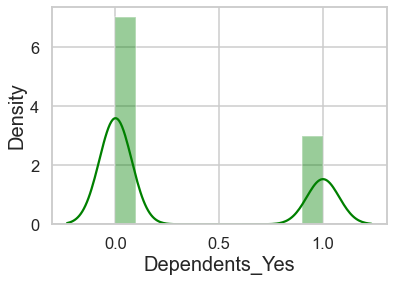

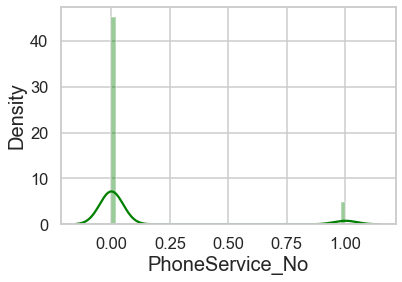

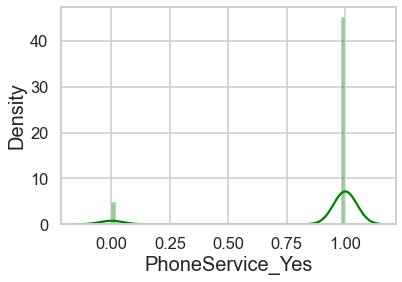

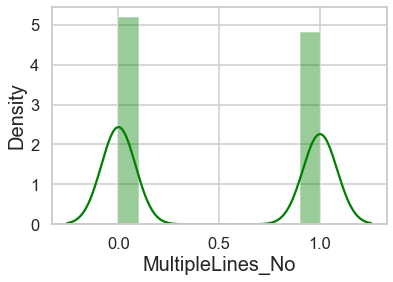

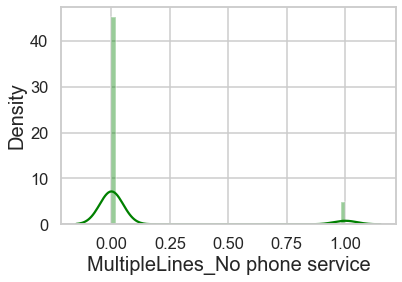

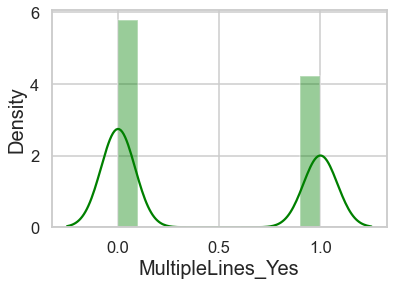

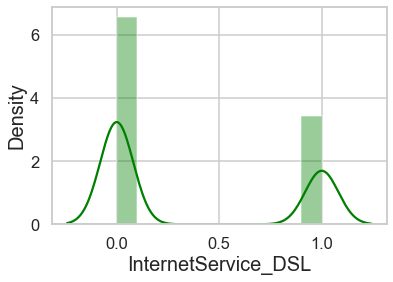

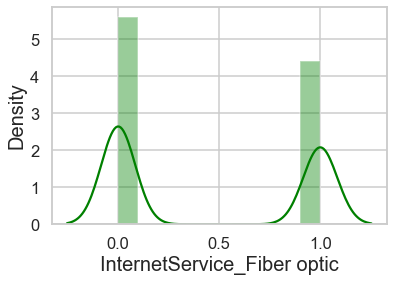

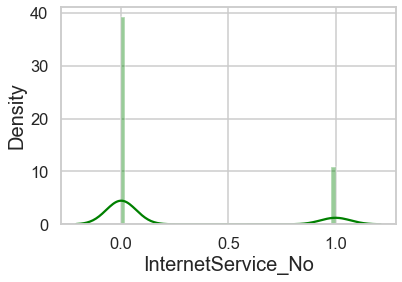

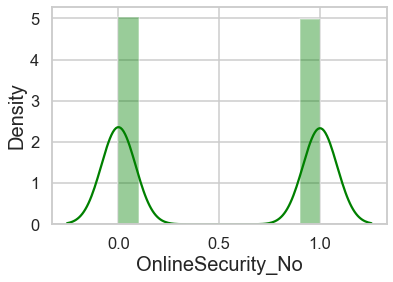

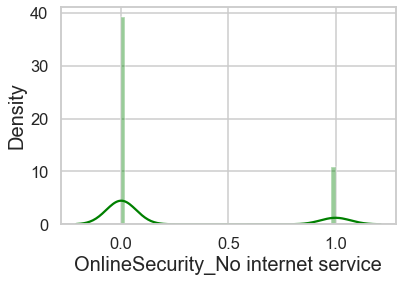

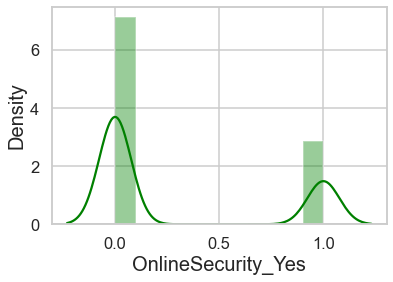

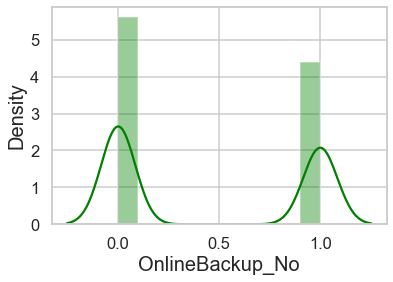

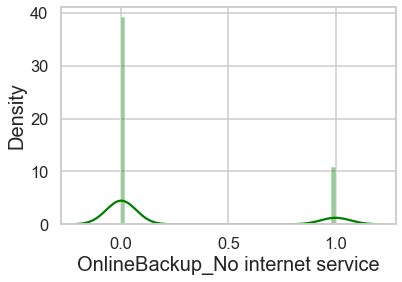

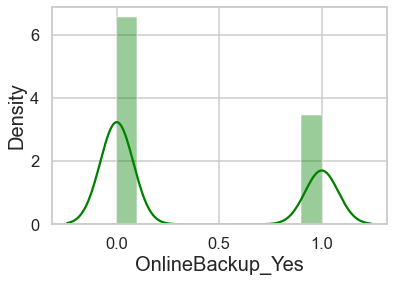

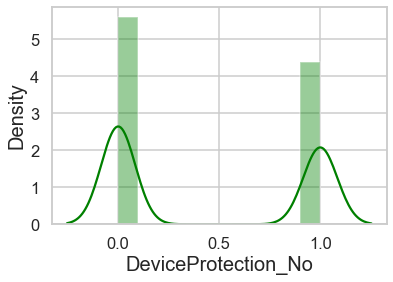

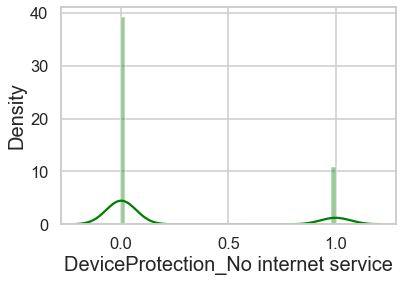

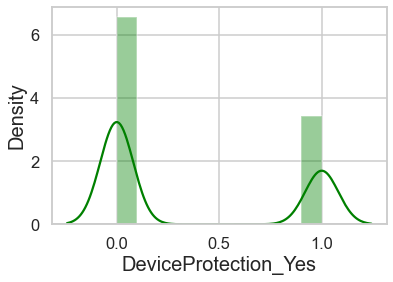

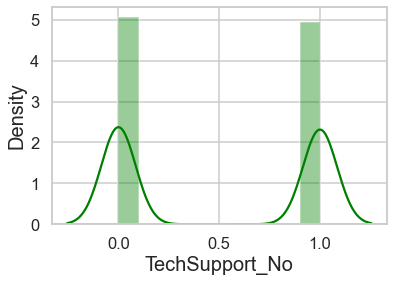

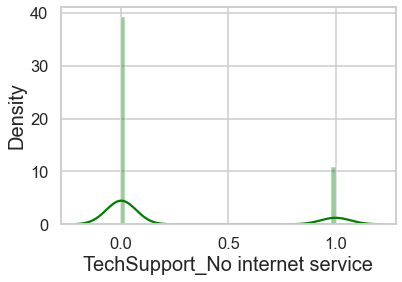

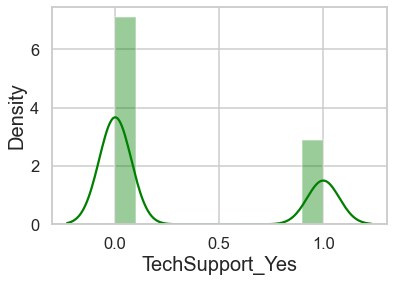

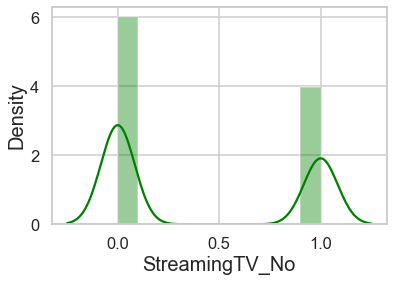

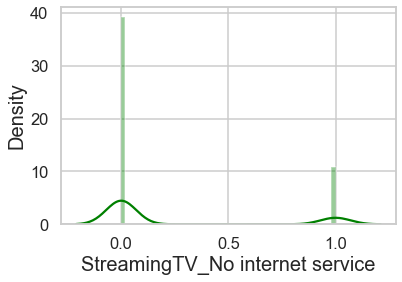

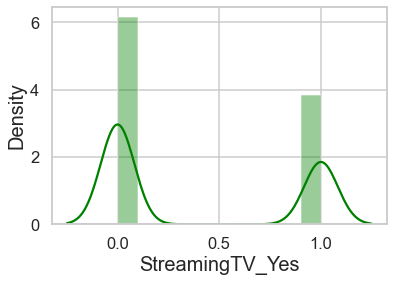

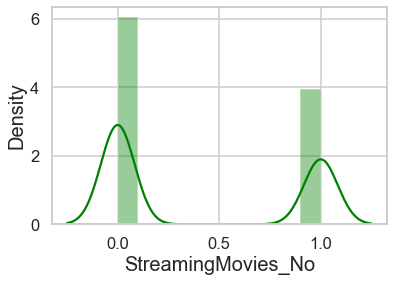

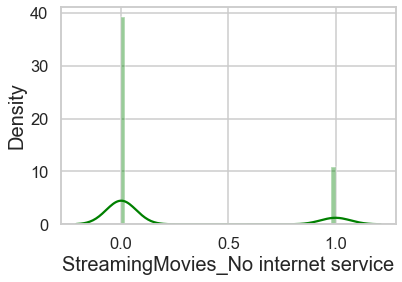

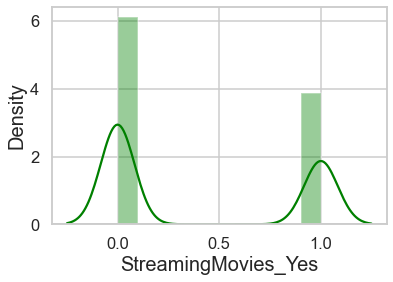

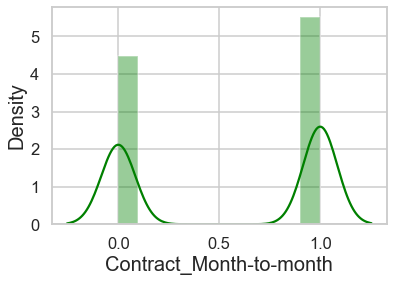

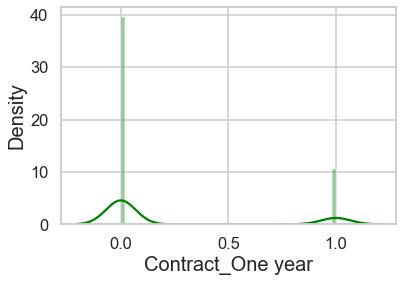

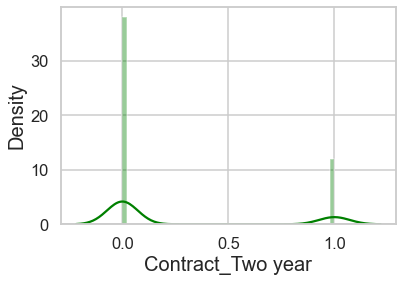

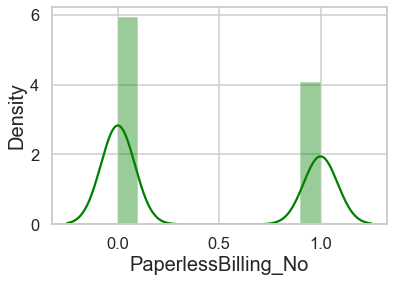

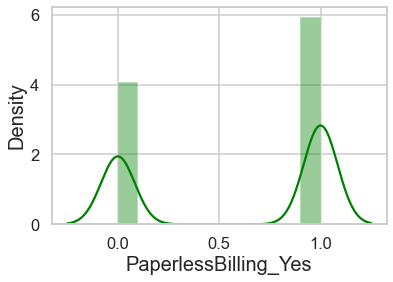

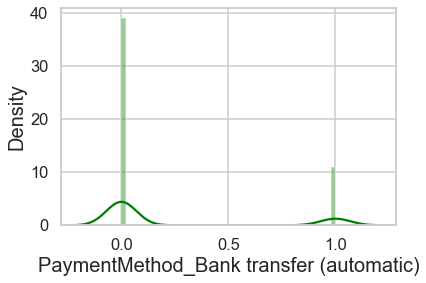

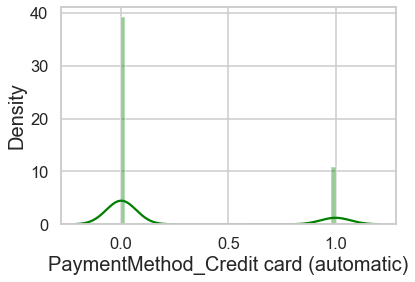

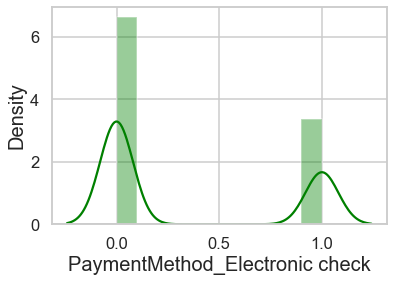

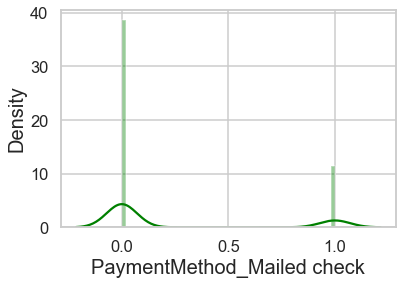

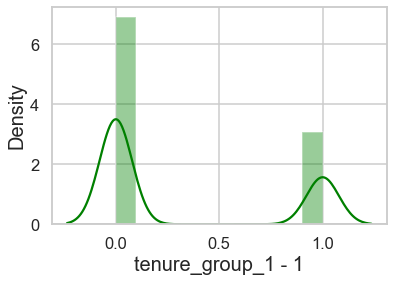

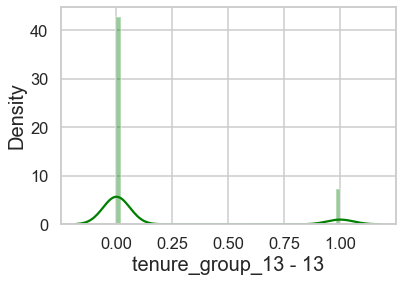

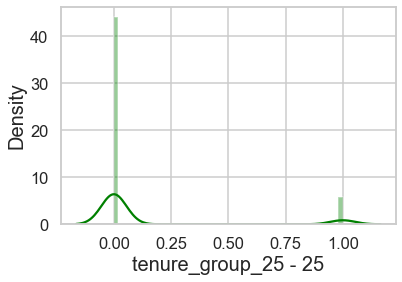

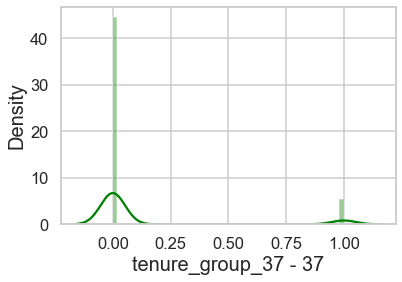

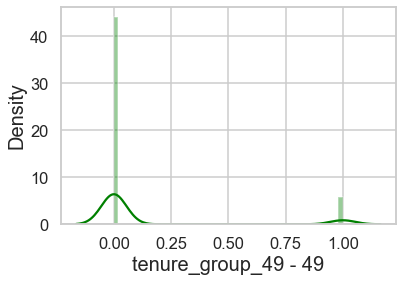

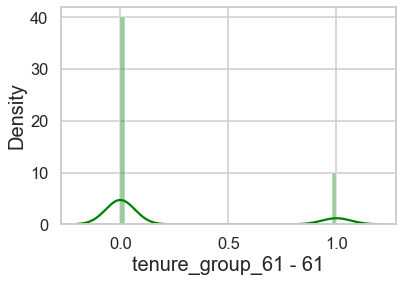

In [45]:
for i in df1.columns:
    plt.figure()
    sns.distplot(df1[i],color='green')

### Percentage of loss

In [46]:
loss = (7032-6352)/7032*100
print(loss)

9.670079635949943


Percentage of data loss is less than 10 percent we can countinue with new dataframe 

In [47]:
x = df1.drop('Churn',axis = 1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 1,tenure_group_13 - 13,tenure_group_25 - 25,tenure_group_37 - 37,tenure_group_49 - 49,tenure_group_61 - 61
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [48]:
y = df1['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(x)
x

array([[0.        , 0.12319747, 0.03237929, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.39966867, 0.59218423, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36861433, 0.14735378, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.12058248, 0.2904553 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.57244079, 0.27334812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.87511465, 0.92549593, ..., 0.        , 0.        ,
        1.        ]])

### Classification model building

In [51]:
mnb=MultinomialNB()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 7 The model performs very well
At random state:- 7
Training score is:- 72.67555555555556
Testing score is:- 72.70788912579957
At random state 113 The model performs very well
At random state:- 113
Training score is:- 72.72888888888889
Testing score is:- 72.70788912579957
At random state 149 The model performs very well
At random state:- 149
Training score is:- 72.62222222222222
Testing score is:- 72.636815920398
At random state 305 The model performs very well
At random state:- 305
Training score is:- 72.64
Testing score is:- 72.56574271499645
At random state 350 The model performs very well
At random state:- 350
Training score is:- 72.4088888888889
Testing score is:- 72.42359630419331
At random state 392 The model performs very well
At random state:- 392
Training score is:- 72.56888888888889
Testing score is:- 72.636815920398
At random state 407 The model performs very well
At random state:- 407
Training score is:- 72.76444444444444
Testing score is:- 72.77896233120114

In [52]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7235252309879175
[[714 329]
 [ 60 304]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79      1043
           1       0.48      0.84      0.61       364

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.81      0.72      0.74      1407



In [53]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 72.81001137656428
accuracy_score is :- 72.35252309879175


At cv:- 3
Cross validation score is:- 72.62514220705349
accuracy_score is :- 72.35252309879175


At cv:- 4
Cross validation score is:- 72.66780432309443
accuracy_score is :- 72.35252309879175


At cv:- 5
Cross validation score is:- 72.62488613627654
accuracy_score is :- 72.35252309879175


At cv:- 6
Cross validation score is:- 72.73890784982936
accuracy_score is :- 72.35252309879175


At cv:- 7
Cross validation score is:- 72.71011193321951
accuracy_score is :- 72.35252309879175


At cv:- 8
Cross validation score is:- 72.61092150170649
accuracy_score is :- 72.35252309879175


At cv:- 9
Cross validation score is:- 72.62490180432619
accuracy_score is :- 72.35252309879175




In [54]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)

    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [55]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7356076759061834
0.9975111111111111
[[853 190]
 [182 182]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1043
           1       0.49      0.50      0.49       364

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



In [56]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 71.7292377701934
accuracy_score is :- 73.56076759061834


At cv:- 3
Cross validation score is:- 72.52559726962457
accuracy_score is :- 73.56076759061834


At cv:- 4
Cross validation score is:- 72.81001137656426
accuracy_score is :- 73.56076759061834


At cv:- 5
Cross validation score is:- 72.3259641641417
accuracy_score is :- 73.56076759061834


At cv:- 6
Cross validation score is:- 72.61092150170649
accuracy_score is :- 73.56076759061834


At cv:- 7
Cross validation score is:- 73.25053729644324
accuracy_score is :- 73.56076759061834


At cv:- 8
Cross validation score is:- 73.12286689419795
accuracy_score is :- 73.56076759061834


At cv:- 9
Cross validation score is:- 72.4401720457338
accuracy_score is :- 73.56076759061834




In [57]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
Best parameters are:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy score:  0.7847116277988234


In [58]:
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 27 The model performs very well
At random state:- 27
Training score is:- 80.87111111111112
Testing score is:- 80.88130774697939
At random state 38 The model performs very well
At random state:- 38
Training score is:- 80.74666666666667
Testing score is:- 80.73916133617625
At random state 125 The model performs very well
At random state:- 125
Training score is:- 80.80000000000001
Testing score is:- 80.81023454157783
At random state 240 The model performs very well
At random state:- 240
Training score is:- 80.51555555555555
Testing score is:- 80.52594171997157
At random state 247 The model performs very well
At random state:- 247
Training score is:- 80.71111111111111
Testing score is:- 80.73916133617625
At random state 319 The model performs very well
At random state:- 319
Training score is:- 80.78222222222222
Testing score is:- 80.81023454157783
At random state 349 The model performs very well
At random state:- 349
Training score is:- 80.67555555555556
Testing score is:- 

In [59]:
lm=LogisticRegression() 
lm.fit(x_train,y_train)

lm.score(x_train,y_train)
pred_test=lm.predict(x_test)
pred_train=lm.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.822316986496091
0.8032
[[953  90]
 [160 204]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1043
           1       0.69      0.56      0.62       364

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.75      1407
weighted avg       0.81      0.82      0.82      1407



In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)

    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [63]:
knn=DecisionTreeClassifier() 
knn.fit(x_train,y_train)

knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7412935323383084
0.9975111111111111
[[851 197]
 [167 192]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1048
           1       0.49      0.53      0.51       359

    accuracy                           0.74      1407
   macro avg       0.66      0.67      0.67      1407
weighted avg       0.75      0.74      0.74      1407



In [64]:
from sklearn.model_selection import cross_val_score
knn=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
knns= accuracy_score(y_test,pred_test)
for j in range(2,10):
    knnscore = cross_val_score(dtc,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",knns*100)
    print("\n")

At cv:- 2
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 3
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 4
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 5
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 6
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 7
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 8
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084


At cv:- 9
Cross validation score is:- 72.4401720457338
accuracy_score is :- 74.12935323383084




In [65]:
from sklearn.model_selection import GridSearchCV
knn=DecisionTreeClassifier()
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(knn, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=8)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}
Accuracy score:  0.7896887741742415


In [62]:
from imblearn.combine import SMOTEENN

In [66]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(x,y)

In [67]:

xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [68]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [69]:

model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9187056037884768
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       550
           1       0.92      0.94      0.93       717

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [70]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[491  59]
 [ 44 673]]


Now we can see quite better results, i.e. Accuracy: 91 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [73]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [74]:
y_pred=model_rf.predict(x_test)

In [75]:
model_rf.score(x_test,y_test)

0.8166311300639659

In [76]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1048
           1       0.71      0.48      0.57       359

    accuracy                           0.82      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.81      0.82      0.80      1407



In [77]:

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_sample(x,y)

In [78]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [79]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [80]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [81]:

yr_predict1 = model_rf_smote.predict(xr_test1)

In [82]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [83]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.915481832543444
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       522
           1       0.91      0.95      0.93       744

    accuracy                           0.92      1266
   macro avg       0.92      0.91      0.91      1266
weighted avg       0.92      0.92      0.92      1266



In [84]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[454  68]
 [ 39 705]]


In [85]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [86]:

model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [87]:

model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [88]:
yr_predict_pca = model.predict(xr_test_pca)

In [89]:

model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [90]:

print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.8909952606635071
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       522
           1       0.91      0.91      0.91       744

    accuracy                           0.89      1266
   macro avg       0.89      0.89      0.89      1266
weighted avg       0.89      0.89      0.89      1266



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage 

### Model Saving

In [91]:
import pickle

In [92]:

filename = 'model.sav'

In [93]:

pickle.dump(model_rf_smote, open(filename, 'wb'))

In [94]:

load_model = pickle.load(open(filename, 'rb'))

In [95]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [96]:

model_score_r1

0.915481832543444